## Access DataSet
https://www.kaggle.com/c/fake-news/data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, TextVectorization, Concatenate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.drop(columns=['id'], inplace=True)
df = df.dropna()
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
def make_transform(X):
    title=X['title']
    author=X['author']
    text=X['text']

    title_vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=1000, output_mode='int')
    author_vectorizer = TextVectorization(max_tokens=10000, output_sequence_length=500, output_mode='int')
    text_vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=1800, output_mode='int')

    title_vectorizer.adapt(title.values)
    author_vectorizer.adapt(author.values)
    text_vectorizer.adapt(text.values)

    vectorized_titles = np.array(title_vectorizer(title.values))
    vectorized_authors = np.array(author_vectorizer(author.values))
    vectorized_texts = np.array(text_vectorizer(text.values))
    vectorized = np.concatenate([vectorized_titles, vectorized_authors, vectorized_texts], axis=1)

    return vectorized


In [5]:
X=df.iloc[:,0:3]
y=df.iloc[:,-1].values

In [6]:
vectorized=make_transform(X)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(vectorized,y,test_size=0.2,random_state=1)

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16).prefetch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16).prefetch(8)

In [9]:
model = Sequential([
    Embedding(20000+1, 32),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Epoch 1/3
915/915 ━━━━━━━━━━━━━━━━━━━━ 310s 336ms/step - accuracy: 0.8401 - loss: 0.3211 - val_accuracy: 0.9412 - val_loss: 0.1331
Epoch 2/3
915/915 ━━━━━━━━━━━━━━━━━━━━ 289s 316ms/step - accuracy: 0.9707 - loss: 0.0831 - val_accuracy: 0.9448 - val_loss: 0.1423
Epoch 3/3
915/915 ━━━━━━━━━━━━━━━━━━━━ 286s 313ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9385 - val_loss: 0.2122


<Figure size 800x500 with 0 Axes>

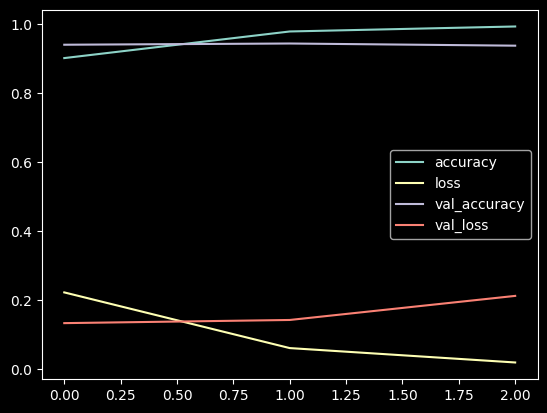

In [12]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [13]:
test_df=pd.read_csv(r'test.csv')
y=pd.read_csv(r'submit.csv')


In [15]:
result=pd.concat([test_df, y], axis=1)
result.columns = ['id1', 'title', 'author', 'text', 'id2', 'label']
result.head()

,id1,title,author,text,id2,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",20800,0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,20801,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,20802,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",20803,1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,20804,1


In [16]:
mismatched_entries = result[result['id1'] != result['id2']]
mismatched_entries

,id1,title,author,text,id2,label


In [17]:
result.drop(columns=['id1','id2'], inplace=True)
result = result.dropna()

In [18]:
X_test=df.iloc[:,0:3]
y_test=df.iloc[:,-1].values

In [19]:
vectorized=make_transform(X_test)

In [20]:
test_predictions = (model.predict(vectorized) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

572/572 ━━━━━━━━━━━━━━━━━━━━ 49s 85ms/step
Test Accuracy: 0.9858
